## Setup the notebook

In [1]:
import os, sys

if os.environ.get("KAGGLE_KERNEL_RUN_TYPE"):
    from kaggle_secrets import UserSecretsClient
    import subprocess
    
    user_secrets = UserSecretsClient()
    token = user_secrets.get_secret("git_token")
    
    repo_url = f"git+https://{token}@github.com/Blaku03/PitchAnalyzer_AI.git"
    
    subprocess.check_call(
        ["pip", "install", repo_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.STDOUT
    )
    video_path = "/kaggle/input/pitchtest/B1606b0e6_1 (91).mp4"
    output_path = "./output_video.avi"
else:
    # reloads the code during development
    %load_ext autoreload
    %autoreload 2
    # ensure project root (one level up) is on PATH
    ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if ROOT not in sys.path:
        sys.path.insert(0, ROOT)

    video_path = "../sample_data/B1606b0e6_1 (91).mp4"
    output_path = "../output_videos/output_video.avi"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

## Import the model

In [2]:
from utils.import_models import ModelImporter
players_model = ModelImporter().download_player_model()

Model downloaded to /home/bbrzyski/.cache/kagglehub/models/blaku03/player-detection/pyTorch/player_detectionv1_1/1


## Sanity check on the first frame


0: 544x960 1 goalkeeper, 20 players, 1 referee, 33.5ms
1: 544x960 1 ball, 1 goalkeeper, 23 players, 1 referee, 33.5ms
2: 544x960 1 goalkeeper, 22 players, 3 referees, 33.5ms
3: 544x960 1 ball, 2 goalkeepers, 24 players, 1 referee, 33.5ms
4: 544x960 1 ball, 1 goalkeeper, 21 players, 2 referees, 33.5ms
5: 544x960 1 ball, 22 players, 1 referee, 33.5ms
6: 544x960 1 ball, 22 players, 2 referees, 33.5ms
7: 544x960 1 ball, 1 goalkeeper, 21 players, 2 referees, 33.5ms
8: 544x960 1 ball, 20 players, 2 referees, 33.5ms
9: 544x960 1 ball, 1 goalkeeper, 22 players, 3 referees, 33.5ms
Speed: 2.9ms preprocess, 33.5ms inference, 28.1ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 21 players, 2 referees, 33.4ms
1: 544x960 22 players, 2 referees, 33.4ms
2: 544x960 20 players, 2 referees, 33.4ms
3: 544x960 1 ball, 20 players, 2 referees, 33.4ms
4: 544x960 1 ball, 20 players, 2 referees, 33.4ms
5: 544x960 20 players, 2 referees, 33.4ms
6: 544x960 1 ball, 20 players, 2 referees, 33.4ms
7: 

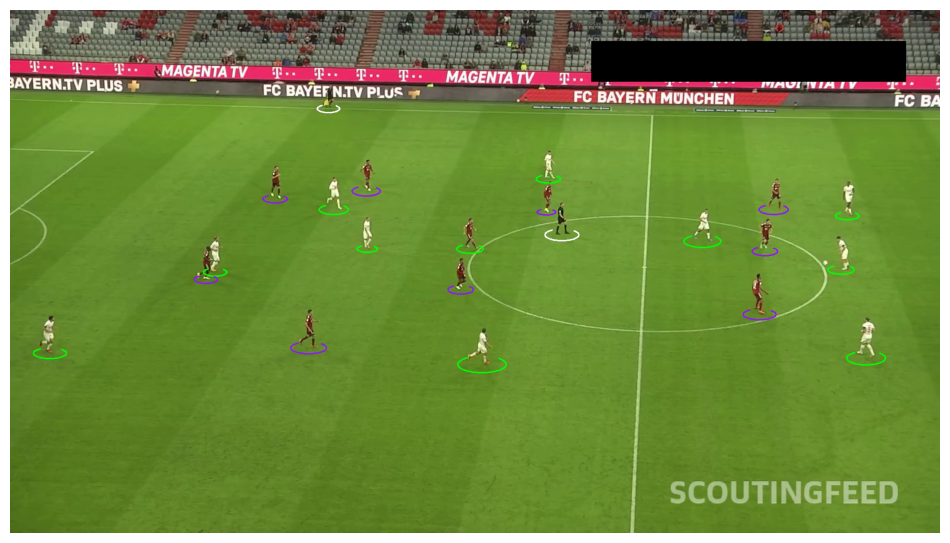

In [3]:
from annotators.player_annotator import PlayersAnnotator
from trackers.game_tracker import GameTracker
from utils.notebook_utils import show_image
from utils.video_utils import read_video

frame_generator = read_video(video_path)
tracks_generator =  GameTracker(players_model).get_detections_from_frames(frame_generator)

first_frame = next(frame_generator)
first_players_tracks = next(tracks_generator)

annotated_sample_image = PlayersAnnotator.annotate_frame(first_frame, first_players_tracks)
show_image(annotated_sample_image)

## Annotate the provided video

In [6]:
from utils.video_utils import save_video

frame_generator = read_video(video_path)
tracks_generator =  GameTracker(players_model).get_detections_from_frames(frame_generator)

frame_generator = read_video(video_path)
annotated_frames_generator = PlayersAnnotator.annotate_video(frame_generator, tracks_generator)
save_video(annotated_frames_generator, output_path)


0: 544x960 1 ball, 22 players, 2 referees, 34.5ms
1: 544x960 1 ball, 1 goalkeeper, 20 players, 2 referees, 34.5ms
2: 544x960 1 ball, 22 players, 1 referee, 34.5ms
3: 544x960 1 ball, 21 players, 1 referee, 34.5ms
4: 544x960 1 ball, 22 players, 2 referees, 34.5ms
5: 544x960 1 goalkeeper, 23 players, 1 referee, 34.5ms
6: 544x960 1 ball, 1 goalkeeper, 20 players, 4 referees, 34.5ms
7: 544x960 1 ball, 20 players, 2 referees, 34.5ms
8: 544x960 21 players, 1 referee, 34.5ms
9: 544x960 1 ball, 21 players, 1 referee, 34.5ms
Speed: 2.7ms preprocess, 34.5ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 1 ball, 20 players, 2 referees, 33.4ms
1: 544x960 21 players, 2 referees, 33.4ms
2: 544x960 22 players, 2 referees, 33.4ms
3: 544x960 20 players, 2 referees, 33.4ms
4: 544x960 1 ball, 20 players, 2 referees, 33.4ms
5: 544x960 1 ball, 20 players, 2 referees, 33.4ms
6: 544x960 20 players, 2 referees, 33.4ms
7: 544x960 1 ball, 20 players, 2 referees, 33.4ms
8: 544x960 1

750